In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
df_players = pd.read_csv('./data/PlayerProfiles.csv')
df_dk = pd.read_csv('./data/draftkings_odds.csv')

In [7]:
df_players.drop_duplicates(inplace=True)

In [9]:
df_players = df_players.rename({
    'Name :' : 'name', 
    'Country :' : 'country',  
    'Age :' : 'age', 
    'Date Of Birth :' : 'dob', 
    'Nickname :' : 'nickname',
    'PDC Ranking :' : 'pdc_ranking', 
    'Tour Card :' : 'has_card',  
    'Career Earnings :' : 'earnings'},
    axis=1)

In [11]:
df_players['earnings'] = df_players['earnings'].str.replace('£', '')
df_players['earnings'] = df_players['earnings'].str.replace(',', '')
df_players['earnings'] = pd.to_numeric(df_players['earnings'])

In [14]:
df = pd.merge(df_players, df_dk, left_on='name', right_on='player')

In [17]:
df.drop(columns=['country', 'dob', 'nickname', 'has_card', 'player'], inplace=True)

In [19]:
df['earnings/age'] = df['earnings'] / df['age']

In [24]:
df['implied_prob'] = 100 / (df['odds'] + 100)

In [25]:
df

,name,age,pdc_ranking,earnings,odds,earnings/age,implied_prob
0,Michael van Gerwen,32,1,8321167,350,260036.468750,0.222222
1,Peter Wright,51,2,3469888,900,68037.019608,0.100000
2,Gerwyn Price,36,3,1497803,350,41605.638889,0.222222
3,Adrian Lewis,36,13,3137634,10000,87156.500000,0.009901
4,James Wade,38,9,3458893,3300,91023.500000,0.029412
5,Steve Beaton,57,25,1109555,30000,19465.877193,0.003322
6,Glen Durrant,50,19,863872,6600,17277.440000,0.014925
7,Andy Boulton,48,68,145765,30000,3036.770833,0.003322
8,Mervyn King,55,22,1733358,6600,31515.600000,0.014925
9,Gary Anderson,50,8,4118772,1400,82375.440000,0.066667


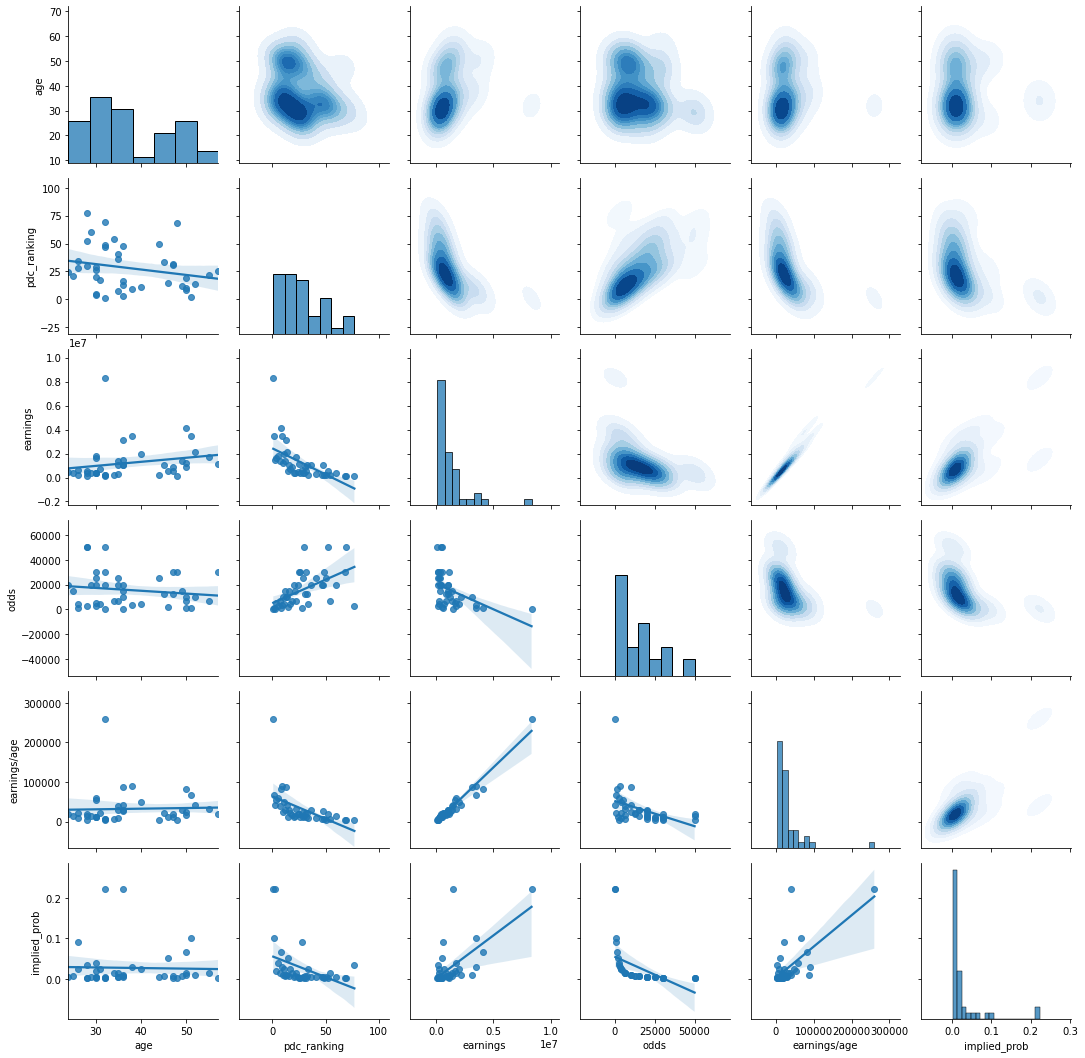

In [26]:
g = sns.PairGrid(df)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True)
g = g.map_diag(sns.histplot)

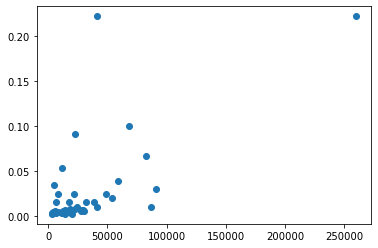

In [31]:
plt.scatter(df['earnings/age'], df['implied_prob'])

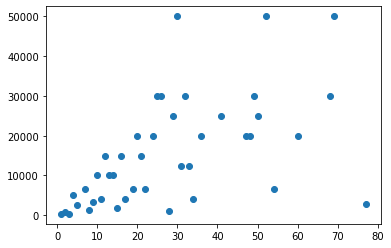

In [29]:
plt.scatter(df['pdc_ranking'], df['odds'])